### Module

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import requests

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

---

### 문제1) 
- 우리 과제는 최동원의 롯데 시절 1983년부터 1988년의 데이터를 사용하도록 하겠습니다. 최동원의 당시 데이터와 함께 1983년부터 1988년 사이 투수들의 데이터(연봉포함)를 구하고, 2015년부터 2020년까지 프로야구의 투수들의 데이터를 구하시오.

- 모든 투수의 데이터를 구하기 어려울 수도 있습니다. 모두 구할 필요는 없습니다. 그러나 선발/마무리에 대해서는 고민하기 바랍니다. 왜냐하면 최동원은 선발로도, 혹은 마무리로도 활동을 했기 때문입니다.

In [75]:
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx'
driver = webdriver.Chrome("/Users/kanghyuntae/Documents/ds_study/강의자료/제로 베이스 - 데이터 사이언스 스쿨 - 강의자료 - Part 05 ~ 08/Part 05. EDA웹 크롤링파이썬 프로그래밍 - 강의자료/driver/chromedriver")
driver.implicitly_wait(3)
driver.get(url)
driver.maximize_window()

In [87]:
cols = ['순위','선수명','팀명','ERA','G','W','L','SV','HLD','WPCT','IP','H','HR','BB','HBP','SO','R','ER','WHIP']

In [123]:
baseball_recent = pd.DataFrame(columns=cols)
baseball_recent

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP


### 2015 ~ 2020 구해보자 ~

In [124]:
# 34~39 = 2015~2020
for num in range(34,40):
    year_Choice = f"#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({num})"
    WebDriverWait(driver, 0.5).until(EC.presence_of_element_located((By.CSS_SELECTOR, year_Choice))).click()
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    teams = []
    tmp = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')[1:]
    for idx in range(len(tmp)):
        teams.append(tmp[idx].text)

    for team in teams:
        team_Choice = '#cphContents_cphContents_cphContents_ddlTeam_ddlTeam'
        WebDriverWait(driver, 1).until(EC.presence_of_element_located((By.CSS_SELECTOR, team_Choice))).send_keys(team)

        time.sleep(1)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        data = soup.find('table',{"class" : "tData01 tt"})
        data = parser_functions.make2d(data)[1:]

        tmpdf = pd.DataFrame(data,columns=cols)
        tmpdf['Year'] = num + 1981

        baseball_recent = pd.concat([baseball_recent,tmpdf])

In [125]:
baseball_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 28
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      1531 non-null   object 
 1   선수명     1531 non-null   object 
 2   팀명      1531 non-null   object 
 3   ERA     1531 non-null   object 
 4   G       1531 non-null   object 
 5   W       1531 non-null   object 
 6   L       1531 non-null   object 
 7   SV      1531 non-null   object 
 8   HLD     1531 non-null   object 
 9   WPCT    1531 non-null   object 
 10  IP      1531 non-null   object 
 11  H       1531 non-null   object 
 12  HR      1531 non-null   object 
 13  BB      1531 non-null   object 
 14  HBP     1531 non-null   object 
 15  SO      1531 non-null   object 
 16  R       1531 non-null   object 
 17  ER      1531 non-null   object 
 18  WHIP    1531 non-null   object 
 19  Year    1531 non-null   float64
dtypes: float64(1), object(19)
memory usage: 251.2+ KB


In [199]:
# 저장
baseball_recent.to_csv('baseball_recent.csv', index=False, encoding='utf-8')

In [134]:
baseball_recent = pd.read_csv('baseball_recent.csv',encoding='utf-8')

### 1983-1988도 구해보자 ~

In [126]:
cols = ['순위', '선수명','팀명', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD', 'WPCT', 'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER']

In [130]:
baseball_old = pd.DataFrame(columns=cols)
baseball_old

,순위,선수명,팀명,ERA,G,CG,SHO,W,L,SV,...,WPCT,TBF,IP,H,HR,BB,HBP,SO,R,ER


In [131]:
# 2~8 = 1983~1988
for num in range(2,8):
    year_Choice = f"#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({num})"
    WebDriverWait(driver, 0.5).until(EC.presence_of_element_located((By.CSS_SELECTOR, year_Choice))).click()
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    teams = []
    tmp = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')[1:]
    for idx in range(len(tmp)):
        teams.append(tmp[idx].text)

    for team in teams:
        team_Choice = '#cphContents_cphContents_cphContents_ddlTeam_ddlTeam'
        WebDriverWait(driver, 1).until(EC.presence_of_element_located((By.CSS_SELECTOR, team_Choice))).send_keys(team)

        time.sleep(1)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        data = soup.find('table',{"class" : "tData01 tt"})
        data = parser_functions.make2d(data)[1:]

        tmpdf = pd.DataFrame(data,columns=cols)
        tmpdf['Year'] = num + 1981

        baseball_old = pd.concat([baseball_old,tmpdf])

In [133]:
baseball_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 11
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      452 non-null    object 
 1   선수명     452 non-null    object 
 2   팀명      452 non-null    object 
 3   ERA     452 non-null    object 
 4   G       452 non-null    object 
 5   CG      452 non-null    object 
 6   SHO     452 non-null    object 
 7   W       452 non-null    object 
 8   L       452 non-null    object 
 9   SV      452 non-null    object 
 10  HLD     452 non-null    object 
 11  WPCT    452 non-null    object 
 12  TBF     452 non-null    object 
 13  IP      452 non-null    object 
 14  H       452 non-null    object 
 15  HR      452 non-null    object 
 16  BB      452 non-null    object 
 17  HBP     452 non-null    object 
 18  SO      452 non-null    object 
 19  R       452 non-null    object 
 20  ER      452 non-null    object 
 21  Year    452 non-null    float64
dtypes: 

In [202]:
# 저장
baseball_old.to_csv('baseball_old.csv',index=False,encoding='utf-8')

In [135]:
baseball_old = pd.read_csv('baseball_old.csv', encoding='utf-8')

In [135]:
driver.close()

### 이제 연봉도 구해보자 ~

In [178]:
cols = ['선수','연도','팀','연봉(만원)','WAR']
team_num = [1,2,3,4,5,6,7,8,9,10,101,102]

In [190]:
Salay_df = pd.DataFrame(columns=cols)
Salay_df

,선수,연도,팀,연봉(만원),WAR


In [187]:
# https://wookidocs.tistory.com/127
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--incognito')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-setuid-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])

In [191]:
# 2번 나눠서 하자,,
for year in range(2015,2018):
    for num in team_num:
        url = f'http://www.statiz.co.kr/salary.php?opt=0&sopt={year}&te={num}'
        driver = webdriver.Chrome("/Users/kanghyuntae/Documents/ds_study/강의자료/제로 베이스 - 데이터 사이언스 스쿨 - 강의자료 - Part 05 ~ 08/Part 05. EDA웹 크롤링파이썬 프로그래밍 - 강의자료/driver/chromedriver")
        driver.implicitly_wait(3)
        driver.get(url)
        driver.maximize_window()

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        data = soup.find('table',{"class" : "table table-striped"})

        tmpcols = parser_functions.make2d(data)[0]
        tmpdf = pd.DataFrame(parser_functions.make2d(data)[1:],columns=tmpcols)

        Salay_df = pd.concat([Salay_df,tmpdf])

        time.sleep(1)
        driver.quit()
    time.sleep(1)

In [203]:
# 중간저장~
Salay_df.to_csv('Salay2015-2017.csv',index=False,encoding='utf-8')

In [209]:
Salay_df = pd.read_csv('Salay2015-2017.csv',encoding='utf-8')

In [211]:
# 나머지 18,19,20년도
for year in range(2018,2021):
    for num in team_num:
        url = f'http://www.statiz.co.kr/salary.php?opt=0&sopt={year}&te={num}'
        driver = webdriver.Chrome("/Users/kanghyuntae/Documents/ds_study/강의자료/제로 베이스 - 데이터 사이언스 스쿨 - 강의자료 - Part 05 ~ 08/Part 05. EDA웹 크롤링파이썬 프로그래밍 - 강의자료/driver/chromedriver")
        driver.implicitly_wait(3)
        driver.get(url)
        driver.maximize_window()

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        data = soup.find('table',{"class" : "table table-striped"})

        tmpcols = parser_functions.make2d(data)[0]
        tmpdf = pd.DataFrame(parser_functions.make2d(data)[1:],columns=tmpcols)

        Salay_df = pd.concat([Salay_df,tmpdf])

        time.sleep(1)
        driver.quit()
    time.sleep(1)

In [215]:
# 다 됐다 ~ 저장
Salay_df.to_csv('Salay.csv',index=False,encoding='utf-8')

In [136]:
Salay_df = pd.read_csv('Salay.csv', encoding='utf-8')

### 이제 합쳐보자 ~

In [137]:
# 연도가 object라서 float으로 바꿔주자
Salay_df = Salay_df.astype({'연도':'float'})
Salay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      3871 non-null   object 
 1   연도      3871 non-null   float64
 2   팀       3871 non-null   object 
 3   연봉(만원)  3871 non-null   object 
 4   WAR     2451 non-null   float64
dtypes: float64(2), object(3)
memory usage: 151.3+ KB


In [139]:
tmp = pd.merge(
    baseball_recent, Salay_df, how='left',
    left_on=['Year','팀명','선수명'], right_on= ['연도','팀','선수']
)

In [143]:
# 연봉 정보가 notnull인 데이터만 가져오자
baseball_salay = tmp[tmp['연봉(만원)'].notna()]
# 중복도 제거하자
baseball_salay = baseball_salay.drop_duplicates()
# 인덱스도 리셋~
baseball_salay = baseball_salay.reset_index()

In [144]:
baseball_salay = baseball_salay.iloc[:,1:]
baseball_salay

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SO,R,ER,WHIP,Year,선수,연도,팀,연봉(만원),WAR
0,1,김정인,넥센,0.00,1,0,0,0,0,-,...,0,0,0,0.00,2015.0,김정인,2015.0,넥센,"3,000",0.045
1,2,양훈,넥센,1.41,16,2,1,0,0,0.667,...,15,9,6,1.23,2015.0,양훈,2015.0,넥센,"15,000",1.860
2,3,조상우,넥센,3.09,70,8,5,5,19,0.615,...,89,36,32,1.14,2015.0,조상우,2015.0,넥센,"17,000",3.360
3,4,밴헤켄,넥센,3.62,32,15,8,0,0,0.652,...,193,92,79,1.31,2015.0,밴헤켄,2015.0,넥센,"65,000",5.116
4,7,금민철,넥센,4.50,7,1,1,0,0,0.500,...,11,11,11,1.77,2015.0,금민철,2015.0,넥센,"7,900",0.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,25,김택형,SK,8.61,31,1,3,0,3,0.250,...,22,26,22,2.00,2020.0,김택형,2020.0,SK,"3,700",-0.748
1058,26,양선률,SK,9.00,1,0,0,0,0,-,...,0,1,1,3.00,2020.0,양선률,2020.0,SK,"2,700",-0.008
1059,27,신재웅,SK,9.31,24,2,0,0,0,1.000,...,11,20,20,2.07,2020.0,신재웅,2020.0,SK,"11,000",-0.258
1060,28,김찬호,SK,27.00,3,0,0,0,0,-,...,1,6,6,4.50,2020.0,김찬호,2020.0,SK,"2,900",-0.187


In [145]:
# 이것도 일단 저장~
baseball_salay.to_csv('baseball_salay.csv',index=False,encoding='utf-8')

---

### 문제 2, 3
- 스케일링 및 예측!

#### 전처리 부터 해주자

In [146]:
baseball_salay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      1062 non-null   int64  
 1   선수명     1062 non-null   object 
 2   팀명      1062 non-null   object 
 3   ERA     1062 non-null   object 
 4   G       1062 non-null   int64  
 5   W       1062 non-null   int64  
 6   L       1062 non-null   int64  
 7   SV      1062 non-null   int64  
 8   HLD     1062 non-null   int64  
 9   WPCT    1062 non-null   object 
 10  IP      1062 non-null   object 
 11  H       1062 non-null   int64  
 12  HR      1062 non-null   int64  
 13  BB      1062 non-null   int64  
 14  HBP     1062 non-null   int64  
 15  SO      1062 non-null   int64  
 16  R       1062 non-null   int64  
 17  ER      1062 non-null   int64  
 18  WHIP    1062 non-null   object 
 19  Year    1062 non-null   float64
 20  선수      1062 non-null   object 
 21  연도      1062 non-null   float64
 22  

In [147]:
# 일단 연봉을 flooat으로 바꾸자
baseball_salay['연봉(만원)'] = baseball_salay['연봉(만원)'].str.replace(',','').astype(float)

In [148]:
baseball_salay.columns
# ERA: 평균 자책점
# G: 게임 
# W: 승리 
# L: 패배 
# SV: 세이브 
# HLD: 홀드
# WPCT: 승률
# IP: 이닝
# H: 피안타
# HR: 홈런
# BB: 볼넷
# HBP: 사구
# SO: 삼진
# R: 실점
# ER: 자책점
# WHIP: 이닝 당 출루 허용률
# WAR: 대체선수 대비 승리 기여도

# 일단은 다 필요해보이는데? 전부 feature로 가져가야겠다.

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'Year', '선수', '연도', '팀',
       '연봉(만원)', 'WAR'],
      dtype='object')

In [149]:
baseball_salay[['선수명','IP','연봉(만원)']]

,선수명,IP,연봉(만원)
0,김정인,1,3000.0
1,양훈,38 1/3,15000.0
2,조상우,93 1/3,17000.0
3,밴헤켄,196 2/3,65000.0
4,금민철,22,7900.0
...,...,...,...
1057,김택형,23,3700.0
1058,양선률,1,2700.0
1059,신재웅,19 1/3,11000.0
1060,김찬호,2,2900.0


In [150]:
# 이닝 수가 33 1/3 이런 식으로 되어있는게 있는데 바꿔줘야 할 것 같다.
IP_f = []
for func in list(baseball_salay.IP):
    tmp = func.split()
    if len(tmp) == 2:
        IP_f.append(float(tmp[0]) + float(eval(tmp[1])))
    else:
        IP_f.append(float(eval(tmp[0])))
IP_f

[1.0,
 38.333333333333336,
 93.33333333333333,
 196.66666666666666,
 22.0,
 2.0,
 177.33333333333334,
 123.33333333333333,
 37.333333333333336,
 91.66666666666667,
 50.333333333333336,
 15.333333333333334,
 34.666666666666664,
 58.0,
 1.0,
 18.333333333333332,
 2.6666666666666665,
 19.333333333333332,
 5.0,
 1.0,
 14.666666666666666,
 46.666666666666664,
 63.0,
 61.666666666666664,
 189.66666666666666,
 68.0,
 169.66666666666666,
 86.0,
 58.333333333333336,
 90.0,
 92.33333333333333,
 56.0,
 9.0,
 102.66666666666667,
 17.333333333333332,
 68.33333333333333,
 15.333333333333334,
 1.0,
 1.6666666666666665,
 2.3333333333333335,
 10.666666666666666,
 4.0,
 0.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 18.333333333333332,
 210.0,
 179.33333333333334,
 82.0,
 38.666666666666664,
 4.0,
 72.66666666666667,
 125.0,
 59.0,
 20.333333333333332,
 114.0,
 44.666666666666664,
 13.0,
 28.666666666666668,
 39.666666666666664,
 20.333333333333332,
 29.0,
 1.6666666666666665,
 1.6666666

In [151]:
# 교체 ~
for idx in range(len(IP_f)):
    baseball_salay.loc[idx,'IP'] = IP_f[idx]

In [152]:
cols = [
        'ERA', 'G', 'W', 'L', 'WPCT', 'IP', 'H',
        'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'WAR' ,'연봉(만원)'
] 
# 필요한 수치들만 가져오자
# 음 근데 선발 투수 기준으로는 세이브랑 홀드는 필요 없는 것 같아 일단 빼자
baseball_salay.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'Year', '선수', '연도', '팀',
       '연봉(만원)', 'WAR'],
      dtype='object')

In [153]:
baseball_salay = baseball_salay[cols]
baseball_salay
# WPCT도 정리가 좀 필요해보이네

,ERA,G,W,L,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,WAR,연봉(만원)
0,0.00,1,0,0,-,1.0,0,0,0,0,0,0,0,0.00,0.045,3000.0
1,1.41,16,2,1,0.667,38.333333,33,1,14,0,15,9,6,1.23,1.860,15000.0
2,3.09,70,8,5,0.615,93.333333,65,4,41,6,89,36,32,1.14,3.360,17000.0
3,3.62,32,15,8,0.652,196.666667,190,14,67,1,193,92,79,1.31,5.116,65000.0
4,4.50,7,1,1,0.500,22.0,25,2,14,2,11,11,11,1.77,0.628,7900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,8.61,31,1,3,0.250,23.0,26,5,20,0,22,26,22,2.00,-0.748,3700.0
1058,9.00,1,0,0,-,1.0,1,1,2,0,0,1,1,3.00,-0.008,2700.0
1059,9.31,24,2,0,1.000,19.333333,26,5,14,0,11,20,20,2.07,-0.258,11000.0
1060,27.00,3,0,0,-,2.0,5,1,4,0,1,6,6,4.50,-0.187,2900.0


In [154]:
baseball_salay = baseball_salay[baseball_salay['WPCT'] != '-']

In [155]:
# WAR 정보가 없는 idx도 제거
baseball_salay = baseball_salay[baseball_salay['WAR'].notna()]

In [156]:
# 또 인덱스 리셋 해주고
baseball_salay = baseball_salay.reset_index()
baseball_salay = baseball_salay.iloc[:,1:]

In [157]:
remove_idx = []
print(baseball_salay.shape)

# 혹시 ''로 값이 들어가 있는 IDX가 있다면 제거 ~
for i in baseball_salay.index:
    for j in baseball_salay.columns:
        if baseball_salay.loc[i,j] == '':
            remove_idx.append(i)

new_idx = [i for i in baseball_salay.index if i not in remove_idx] 
baseball_salay = baseball_salay.iloc[new_idx,:]
baseball_salay.shape

(769, 16)


(769, 16)

In [158]:
# 실수로 다 바꿔주자
baseball_salay = baseball_salay.astype(float)
baseball_salay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ERA     769 non-null    float64
 1   G       769 non-null    float64
 2   W       769 non-null    float64
 3   L       769 non-null    float64
 4   WPCT    769 non-null    float64
 5   IP      769 non-null    float64
 6   H       769 non-null    float64
 7   HR      769 non-null    float64
 8   BB      769 non-null    float64
 9   HBP     769 non-null    float64
 10  SO      769 non-null    float64
 11  R       769 non-null    float64
 12  ER      769 non-null    float64
 13  WHIP    769 non-null    float64
 14  WAR     769 non-null    float64
 15  연봉(만원)  769 non-null    float64
dtypes: float64(16)
memory usage: 102.1 KB


In [159]:
# 인덱스 리셋 해주자,,
baseball_salay = baseball_salay.reset_index()
baseball_salay = baseball_salay.iloc[:,1:]
baseball_salay

,ERA,G,W,L,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,WAR,연봉(만원)
0,1.41,16.0,2.0,1.0,0.667,38.333333,33.0,1.0,14.0,0.0,15.0,9.0,6.0,1.23,1.860,15000.0
1,3.09,70.0,8.0,5.0,0.615,93.333333,65.0,4.0,41.0,6.0,89.0,36.0,32.0,1.14,3.360,17000.0
2,3.62,32.0,15.0,8.0,0.652,196.666667,190.0,14.0,67.0,1.0,193.0,92.0,79.0,1.31,5.116,65000.0
3,4.50,7.0,1.0,1.0,0.500,22.000000,25.0,2.0,14.0,2.0,11.0,11.0,11.0,1.77,0.628,7900.0
4,4.67,30.0,13.0,11.0,0.542,177.333333,202.0,23.0,61.0,12.0,137.0,101.0,92.0,1.48,3.098,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,6.75,2.0,0.0,2.0,0.000,10.666667,16.0,1.0,4.0,0.0,6.0,11.0,8.0,1.88,-0.323,50000.0
765,7.40,33.0,1.0,6.0,0.143,62.000000,61.0,8.0,39.0,4.0,43.0,52.0,51.0,1.61,-0.453,24000.0
766,7.62,15.0,1.0,1.0,0.500,13.000000,19.0,2.0,8.0,0.0,10.0,13.0,11.0,2.08,-0.631,15000.0
767,8.61,31.0,1.0,3.0,0.250,23.000000,26.0,5.0,20.0,0.0,22.0,26.0,22.0,2.00,-0.748,3700.0


In [160]:
# 마지막으로 
# H: 피안타
# HR: 홈런
# BB: 볼넷
# HBP: 사구
# SO: 삼진
# R: 실점
# ER: 자책점
# 이 친구들은 선수명성에 부정적 영향을 주는 변수인데, 경기에 많이 출장할수록 당연히 높을 수 밖에 없다. 나누기 9를 해주자(야구는 1경기당 9이닝)

t_col = ['H','HR','BB','HBP','SO','R','ER']
subset = baseball_salay[t_col]/9

resume_col = [col for col in baseball_salay.columns if col not in t_col]
subset2 = baseball_salay[resume_col]

display(subset, subset2)

,H,HR,BB,HBP,SO,R,ER
0,3.666667,0.111111,1.555556,0.000000,1.666667,1.000000,0.666667
1,7.222222,0.444444,4.555556,0.666667,9.888889,4.000000,3.555556
2,21.111111,1.555556,7.444444,0.111111,21.444444,10.222222,8.777778
3,2.777778,0.222222,1.555556,0.222222,1.222222,1.222222,1.222222
4,22.444444,2.555556,6.777778,1.333333,15.222222,11.222222,10.222222
...,...,...,...,...,...,...,...
764,1.777778,0.111111,0.444444,0.000000,0.666667,1.222222,0.888889
765,6.777778,0.888889,4.333333,0.444444,4.777778,5.777778,5.666667
766,2.111111,0.222222,0.888889,0.000000,1.111111,1.444444,1.222222
767,2.888889,0.555556,2.222222,0.000000,2.444444,2.888889,2.444444


,ERA,G,W,L,WPCT,IP,WHIP,WAR,연봉(만원)
0,1.41,16.0,2.0,1.0,0.667,38.333333,1.23,1.860,15000.0
1,3.09,70.0,8.0,5.0,0.615,93.333333,1.14,3.360,17000.0
2,3.62,32.0,15.0,8.0,0.652,196.666667,1.31,5.116,65000.0
3,4.50,7.0,1.0,1.0,0.500,22.000000,1.77,0.628,7900.0
4,4.67,30.0,13.0,11.0,0.542,177.333333,1.48,3.098,45000.0
...,...,...,...,...,...,...,...,...,...
764,6.75,2.0,0.0,2.0,0.000,10.666667,1.88,-0.323,50000.0
765,7.40,33.0,1.0,6.0,0.143,62.000000,1.61,-0.453,24000.0
766,7.62,15.0,1.0,1.0,0.500,13.000000,2.08,-0.631,15000.0
767,8.61,31.0,1.0,3.0,0.250,23.000000,2.00,-0.748,3700.0


In [161]:
baseball_salay = pd.concat([subset,subset2],axis = 1)

In [163]:
# 저장 !
baseball_salay.to_csv('Final_baseball_salay.csv', index=False, encoding='utf-8')

In [41]:
Final_baseball_salay = pd.read_csv('/Users/kanghyuntae/Documents/오프라인/과제/20220427/Final_baseball_salay.csv', encoding='utf-8')
Final_baseball_salay

,H,HR,BB,HBP,SO,R,ER,ERA,G,W,L,WPCT,IP,WHIP,WAR,연봉(만원)
0,3.666667,0.111111,1.555556,0.000000,1.666667,1.000000,0.666667,1.41,16.0,2.0,1.0,0.667,38.333333,1.23,1.860,15000.0
1,7.222222,0.444444,4.555556,0.666667,9.888889,4.000000,3.555556,3.09,70.0,8.0,5.0,0.615,93.333333,1.14,3.360,17000.0
2,21.111111,1.555556,7.444444,0.111111,21.444444,10.222222,8.777778,3.62,32.0,15.0,8.0,0.652,196.666667,1.31,5.116,65000.0
3,2.777778,0.222222,1.555556,0.222222,1.222222,1.222222,1.222222,4.50,7.0,1.0,1.0,0.500,22.000000,1.77,0.628,7900.0
4,22.444444,2.555556,6.777778,1.333333,15.222222,11.222222,10.222222,4.67,30.0,13.0,11.0,0.542,177.333333,1.48,3.098,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,1.777778,0.111111,0.444444,0.000000,0.666667,1.222222,0.888889,6.75,2.0,0.0,2.0,0.000,10.666667,1.88,-0.323,50000.0
765,6.777778,0.888889,4.333333,0.444444,4.777778,5.777778,5.666667,7.40,33.0,1.0,6.0,0.143,62.000000,1.61,-0.453,24000.0
766,2.111111,0.222222,0.888889,0.000000,1.111111,1.444444,1.222222,7.62,15.0,1.0,1.0,0.500,13.000000,2.08,-0.631,15000.0
767,2.888889,0.555556,2.222222,0.000000,2.444444,2.888889,2.444444,8.61,31.0,1.0,3.0,0.250,23.000000,2.00,-0.748,3700.0


---

#### 스케일링, Fit

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [35]:
import plotly_express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [36]:
px.box(Final_baseball_salay.iloc[:,:-1])

<AxesSubplot:>

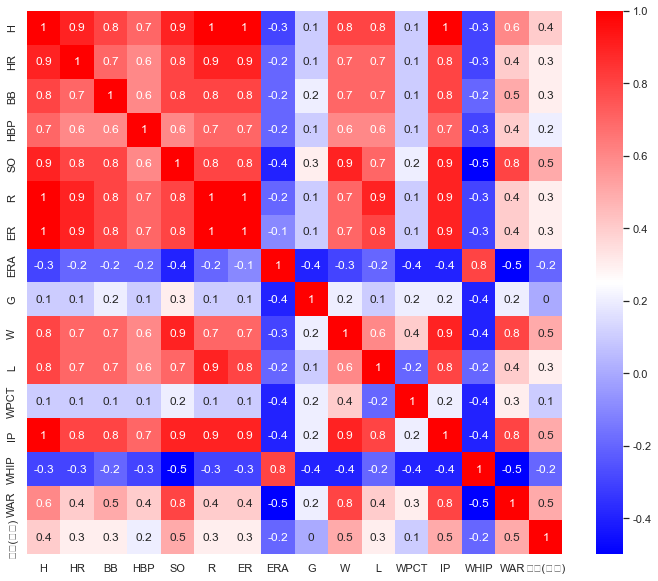

In [37]:
correlation_matrix = Final_baseball_salay.corr().round(1)
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")
# 문제 있어보이는군

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)

# R이 엄청 높네? 빼보자

H 239.61676688501214
HR 12.68042742645022
BB 20.386719722478286
HBP 4.195500888237257
SO 40.44319668058652
R 570.7176810952968
ER 393.1509241764953
ERA 20.091502440396862
G 4.216246450791036
W 13.263107518926036
L 11.74846766255555
WPCT 6.00721923564116
IP 530.8898613034416
WHIP 30.94324219665907
WAR 34.563976566223516


In [43]:
Final_baseball_salay = Final_baseball_salay.drop('R',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)
# IP도 빼보자 ~

H 227.1010601000008
HR 12.677281681831232
BB 20.043878685986247
HBP 4.19501085289264
SO 40.19236580420846
ER 209.84605859084283
ERA 20.090567493980863
G 4.205625463803955
W 13.03970398367633
L 11.692264584650983
WPCT 6.004178930212957
IP 462.6878508377633
WHIP 30.927420802916096
WAR 23.712831152911484


In [44]:
Final_baseball_salay = Final_baseball_salay.drop('IP',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)
# 이번에는 ER도 빼보자 ~

H 142.25287761094353
HR 12.670828462156454
BB 18.27306649955108
HBP 3.9763867303933527
SO 32.269755968108505
ER 190.93053803800518
ERA 20.078437916153405
G 4.205204894888121
W 12.518524809935347
L 11.598714882489615
WPCT 5.953664102622291
WHIP 30.74189053605877
WAR 11.955735630816404


In [45]:
Final_baseball_salay = Final_baseball_salay.drop('ER',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)
# 이번에는 H도 빼보자 ~

H 32.38373579165503
HR 11.176657764548453
BB 12.32995342658738
HBP 3.8333496485896847
SO 30.74879519887553
ERA 16.573705152190435
G 4.202557781818239
W 12.40136053299195
L 11.505348255931734
WPCT 5.8813870685504455
WHIP 26.425897242034985
WAR 6.361827815815636


In [46]:
Final_baseball_salay = Final_baseball_salay.drop('H',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)
# 이번에는 SO도 빼보자 ~

HR 8.742447798190558
BB 12.316985379785919
HBP 3.683202183074748
SO 29.206370933665543
ERA 16.533450683653083
G 4.129039368703989
W 11.74306727656116
L 9.501928933734005
WPCT 5.853636534832221
WHIP 26.136664101534258
WAR 6.327017846759844


In [47]:
Final_baseball_salay = Final_baseball_salay.drop('SO',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)
# 마지막으로 WHIP도 빼보자 ~

HR 8.008341528335524
BB 9.950701946424774
HBP 3.679868562772269
ERA 16.275206857680846
G 3.933897744105662
W 11.112390329873609
L 8.814253490135714
WPCT 5.842700264958294
WHIP 25.592927919469513
WAR 4.373641505423187


In [48]:
Final_baseball_salay = Final_baseball_salay.drop('WHIP',axis=1)

for i in range (Final_baseball_salay.shape[1]-1):
    vif = variance_inflation_factor(Final_baseball_salay.values, i)
    print(Final_baseball_salay.columns[i], vif)

HR 7.900499725291272
BB 9.372258500839429
HBP 3.6797963222503145
ERA 2.9716796411356934
G 3.8408285045347657
W 10.482504403976083
L 8.647559520684485
WPCT 4.7056247246503595
WAR 4.305022678032047


In [49]:
Final_baseball_salay

,HR,BB,HBP,ERA,G,W,L,WPCT,WAR,연봉(만원)
0,0.111111,1.555556,0.000000,1.41,16.0,2.0,1.0,0.667,1.860,15000.0
1,0.444444,4.555556,0.666667,3.09,70.0,8.0,5.0,0.615,3.360,17000.0
2,1.555556,7.444444,0.111111,3.62,32.0,15.0,8.0,0.652,5.116,65000.0
3,0.222222,1.555556,0.222222,4.50,7.0,1.0,1.0,0.500,0.628,7900.0
4,2.555556,6.777778,1.333333,4.67,30.0,13.0,11.0,0.542,3.098,45000.0
...,...,...,...,...,...,...,...,...,...,...
764,0.111111,0.444444,0.000000,6.75,2.0,0.0,2.0,0.000,-0.323,50000.0
765,0.888889,4.333333,0.444444,7.40,33.0,1.0,6.0,0.143,-0.453,24000.0
766,0.222222,0.888889,0.000000,7.62,15.0,1.0,1.0,0.500,-0.631,15000.0
767,0.555556,2.222222,0.000000,8.61,31.0,1.0,3.0,0.250,-0.748,3700.0


<AxesSubplot:>

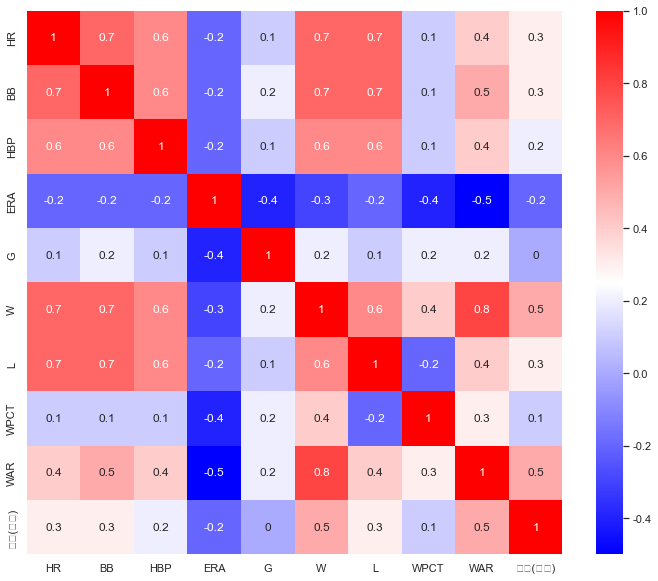

In [50]:
correlation_matrix = Final_baseball_salay.corr().round(1)
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")
# 다시 확인

In [51]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

X = Final_baseball_salay.drop('연봉(만원)', axis=1)
y = Final_baseball_salay['연봉(만원)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())
# 흠 P-value에 근거해서, HR, ERA, WPCT 3가지 피쳐로 예측을 시도해보자.

                            OLS Regression Results                            
Dep. Variable:                 연봉(만원)   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     29.96
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.66e-43
Time:                        15:34:44   Log-Likelihood:                -7138.1
No. Observations:                 615   AIC:                         1.430e+04
Df Residuals:                     605   BIC:                         1.434e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7000.6365   5288.276      1.324      0.1

<AxesSubplot:xlabel='WPCT', ylabel='연봉(만원)'>

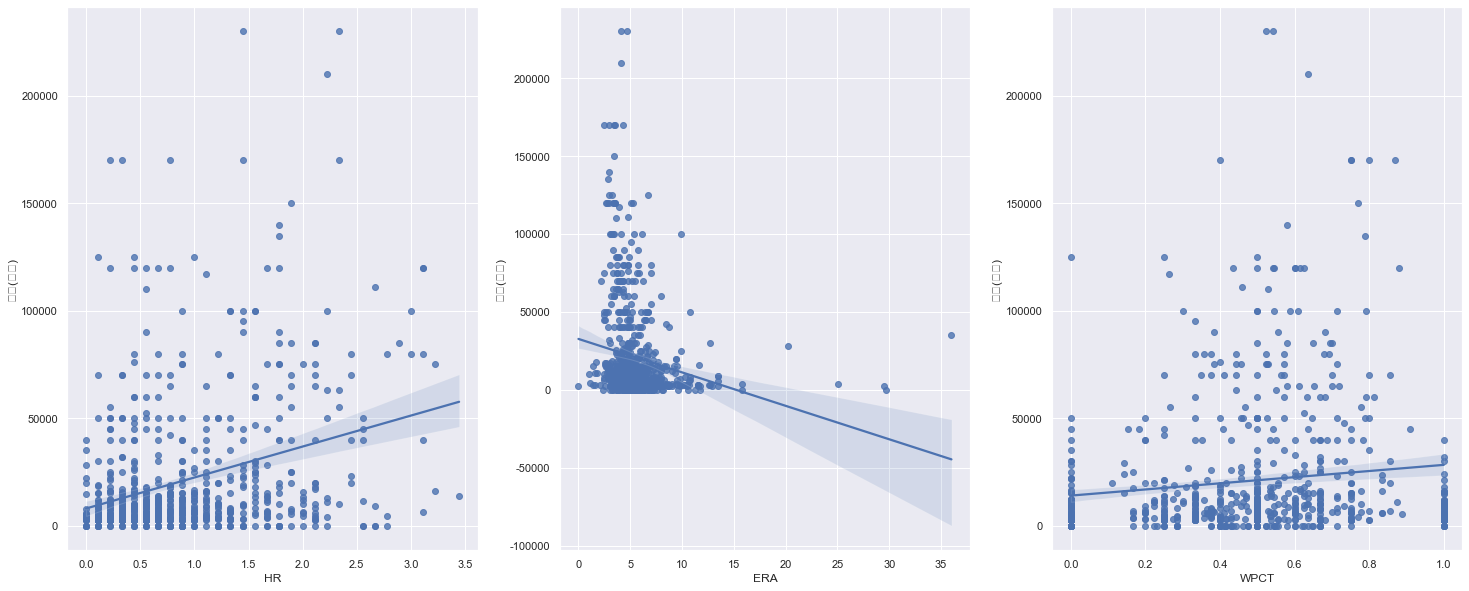

In [52]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (25,10)})

fig, ax = plt.subplots(1,3)
sns.regplot(x='HR', y='연봉(만원)', data = Final_baseball_salay, ax=ax[0])
sns.regplot(x='ERA', y='연봉(만원)', data = Final_baseball_salay, ax=ax[1])
sns.regplot(x='WPCT', y='연봉(만원)', data = Final_baseball_salay, ax=ax[2])
# 흠 wpct도 0이랑 1인 값들 빼주자

In [53]:
Final_baseball_salay = Final_baseball_salay[(Final_baseball_salay['WPCT'] != 0) & (Final_baseball_salay['WPCT'] != 1 )]
Final_baseball_salay

,HR,BB,HBP,ERA,G,W,L,WPCT,WAR,연봉(만원)
0,0.111111,1.555556,0.000000,1.41,16.0,2.0,1.0,0.667,1.860,15000.0
1,0.444444,4.555556,0.666667,3.09,70.0,8.0,5.0,0.615,3.360,17000.0
2,1.555556,7.444444,0.111111,3.62,32.0,15.0,8.0,0.652,5.116,65000.0
3,0.222222,1.555556,0.222222,4.50,7.0,1.0,1.0,0.500,0.628,7900.0
4,2.555556,6.777778,1.333333,4.67,30.0,13.0,11.0,0.542,3.098,45000.0
...,...,...,...,...,...,...,...,...,...,...
762,2.111111,10.000000,1.222222,6.17,30.0,6.0,15.0,0.286,-0.281,0.0
763,0.666667,1.222222,0.333333,6.56,29.0,2.0,2.0,0.500,-0.266,11000.0
765,0.888889,4.333333,0.444444,7.40,33.0,1.0,6.0,0.143,-0.453,24000.0
766,0.222222,0.888889,0.000000,7.62,15.0,1.0,1.0,0.500,-0.631,15000.0


<AxesSubplot:xlabel='WPCT', ylabel='연봉(만원)'>

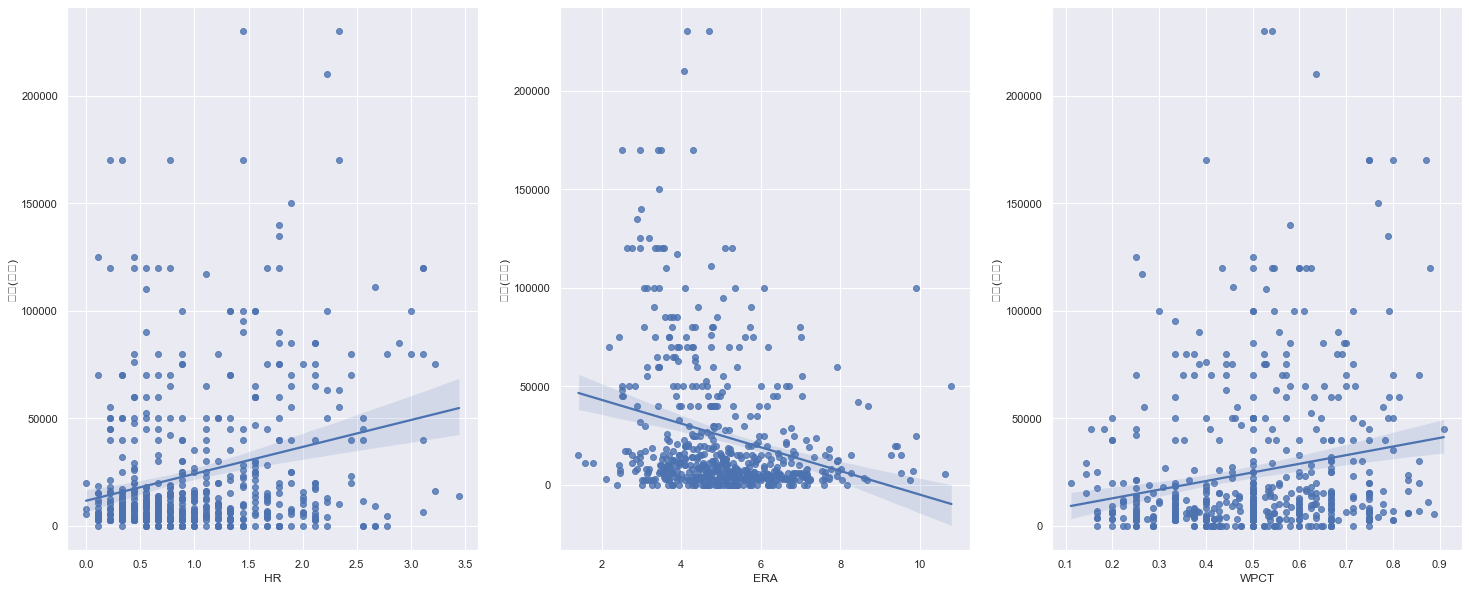

In [54]:
Final_baseball_salay = Final_baseball_salay[(Final_baseball_salay['WPCT'] != 0) & (Final_baseball_salay['WPCT'] != 1)]

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (25,10)})

fig, ax = plt.subplots(1,3)
sns.regplot(x='HR', y='연봉(만원)', data = Final_baseball_salay, ax=ax[0])
sns.regplot(x='ERA', y='연봉(만원)', data = Final_baseball_salay, ax=ax[1])
sns.regplot(x='WPCT', y='연봉(만원)', data = Final_baseball_salay, ax=ax[2])

In [55]:
from sklearn.model_selection import train_test_split

X = Final_baseball_salay.drop('연봉(만원)', axis=1)[['HR','ERA','WPCT']]
y = Final_baseball_salay['연봉(만원)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeRegressor())] 
pipe = Pipeline(estimators)

In [57]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])

In [58]:
from sklearn.metrics import mean_squared_error
pred_tr = pipe.predict(X_train)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))

print('RMSE of Train Data : ', rmse_tr)

RMSE of Train Data :  0.0


In [59]:
from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(y_train, pred_tr)

print('MAE of Train Data : ', mae_tr)

MAE of Train Data :  0.0


---

#### 최동원 선수 연봉은 얼마일까~

In [303]:
# 최동원 선수 기록

url = "https://www.koreabaseball.com/Record/Retire/Pitcher.aspx?playerId=83540"
driver = webdriver.Chrome("/Users/kanghyuntae/Documents/ds_study/강의자료/제로 베이스 - 데이터 사이언스 스쿨 - 강의자료 - Part 05 ~ 08/Part 05. EDA웹 크롤링파이썬 프로그래밍 - 강의자료/driver/chromedriver")
driver.implicitly_wait(3)
driver.get(url)
driver.maximize_window()

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

data = soup.find('table',{"class" : "tData01 tt mb5"})
cols = parser_functions.make2d(data)[0]
data = parser_functions.make2d(data)[1:]
choi_df = pd.DataFrame(data,columns=cols)

In [305]:
driver.quit()

In [321]:
choi_df = choi_df.iloc[:-1,:]

In [316]:
WAR = [5.00, 9.72, 9.88, 11.74, 7.15, 3.86, 0.35, 0.02]
WHIP = [1.21, 1.04, 0.94, 0.97, 1.25, 1.21, 1.80, 1.82]

In [326]:
choi_df['WAR'] = WAR
choi_df['WHIP'] = WHIP

In [60]:
choi_df

,연도,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,IP,H,HR,BB,HB,SO,R,ER,WAR,WHIP
0,1983,롯데,2.89,38,16,1,9,16,4,0,...,208 2/3,202,17,51,8,148,89,67,5.00,1.21
1,1984,롯데,2.40,51,14,1,27,13,6,0,...,284 2/3,228,18,68,14,223,91,76,9.72,1.04
2,1985,롯데,1.92,42,14,4,20,9,8,0,...,225,170,7,41,8,161,60,48,9.88,0.94
3,1986,롯데,1.55,39,17,4,19,14,2,0,...,267,204,7,55,6,208,60,46,11.74,0.97
4,1987,롯데,2.81,32,15,4,14,12,2,0,...,224,218,6,61,7,163,80,70,7.15,1.25
5,1988,롯데,2.05,16,3,1,7,3,3,0,...,83 1/3,77,4,24,1,83,24,19,3.86,1.21
6,1989,삼성,2.10,8,0,0,1,2,0,0,...,30,36,2,18,1,9,12,7,0.35,1.80
7,1990,삼성,5.28,22,2,0,6,5,1,0,...,92,113,9,54,2,24,62,54,0.02,1.82


In [328]:
choi_df.to_csv('choi_df.csv',index=False,encoding='utf-8')

In [61]:
choi_df = pd.read_csv('/Users/kanghyuntae/Documents/오프라인/과제/20220427/choi_df.csv')
choi_df

,연도,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,IP,H,HR,BB,HB,SO,R,ER,WAR,WHIP
0,1983,롯데,2.89,38,16,1,9,16,4,0,...,208 2/3,202,17,51,8,148,89,67,5.00,1.21
1,1984,롯데,2.40,51,14,1,27,13,6,0,...,284 2/3,228,18,68,14,223,91,76,9.72,1.04
2,1985,롯데,1.92,42,14,4,20,9,8,0,...,225,170,7,41,8,161,60,48,9.88,0.94
3,1986,롯데,1.55,39,17,4,19,14,2,0,...,267,204,7,55,6,208,60,46,11.74,0.97
4,1987,롯데,2.81,32,15,4,14,12,2,0,...,224,218,6,61,7,163,80,70,7.15,1.25
5,1988,롯데,2.05,16,3,1,7,3,3,0,...,83 1/3,77,4,24,1,83,24,19,3.86,1.21
6,1989,삼성,2.10,8,0,0,1,2,0,0,...,30,36,2,18,1,9,12,7,0.35,1.80
7,1990,삼성,5.28,22,2,0,6,5,1,0,...,92,113,9,54,2,24,62,54,0.02,1.82


In [62]:
target_cols = list(X.columns)
target_cols

['HR', 'ERA', 'WPCT']

In [63]:
choi_test = choi_df[target_cols]

In [64]:
pay = pd.DataFrame(pipe.predict(choi_test), columns=['연봉(만원)'])
pd.concat([choi_df['연도'], choi_test, pay],axis=1)

,연도,HR,ERA,WPCT,연봉(만원)
0,1983,17,2.89,0.360,120000.0
1,1984,18,2.40,0.675,75000.0
2,1985,7,1.92,0.690,75000.0
3,1986,7,1.55,0.576,140000.0
4,1987,6,2.81,0.538,120000.0
5,1988,4,2.05,0.700,75000.0
6,1989,2,2.10,0.333,120000.0
7,1990,9,5.28,0.545,100000.0


1) feature들을 통계적으로 접근하여 적절하게 선정 및 가공하지 못했다.<br>
2) 선발, 마무리로 구분하여 연봉 계산을 하지 못했다. 